<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Pandas_ex_1_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Seleção de Dados em Pandas 

Referências e Materiais úteis para este Lab:

- [Notas de Aula](https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Pandas_I.ipynb)
- [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

---



In [ ]:
import pandas as pd
import numpy as np

## **CASE Tips** 

##### Q1. Considere a base de dados [`tips`](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/tips.csv). Considerando somente os finais de semana, quem tem média de participantes na mesa maior, fumantes ou não fumantes?



In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/tips.csv') 

Não é necessário fazer assim...

In [ ]:
print('Não fumantes tem média de participantes na mesa maior que fumantes? ',
      df[ (df.smoker == 'Yes') & (df.day.isin(['Sat','Sun'])) ]['size'].mean() < 
      df[ (df.smoker == 'No') & (df.day.isin(['Sat','Sun'])) ]['size'].mean())

Não fumantes tem média de participantes na mesa maior que fumantes?  True


Assim, é suficientemente bom...

In [ ]:
df[ (df.smoker == 'Yes') & (df.day.isin(['Sat','Sun'])) ]['size'].mean()

2.5081967213114753

In [ ]:
df[ (df.smoker == 'No') & (df.day.isin(['Sat','Sun'])) ]['size'].mean()

2.764705882352941

Usando `groupby()`...

In [ ]:
df[ df.day.isin(['Sat','Sun']) ].groupby('smoker')['size'].mean()

smoker
No     2.764706
Yes    2.508197
Name: size, dtype: float64

**Cuidado**... `size` é uma palavra reservada, assim com o `date`, `type` (último exercício) e outras tantas, mas que ainda podem ser empregadas como nome das colunas... 

In [ ]:
df[ (df.smoker == 'No') & (df.day.isin(['Sat','Sun'])) ].size.mean() # valor errado!!!

714.0

## **CASE Insurance** 

Acesse a base de dados [`insurance`](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/insurance.csv) para as questões a seguir.



In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Q2. Qual percentual de homens e mulheres assegurados na base? 

In [ ]:
fem = len( df[df.sex == 'female'] ) / len(df)
print(f'Percentual de Mulheres seguradas: {fem:.2f}') 

masc = len( df[df.sex == 'male'] ) / len(df)
print(f'Percentual de Homens segurados: {masc:.2f}') 


Percentual de Mulheres seguradas: 0.49
Percentual de Homens segurados: 0.51


Usando `groupby()`...

In [ ]:
df.groupby('sex').sex.count() / df.sex.count()

sex
female    0.494768
male      0.505232
Name: sex, dtype: float64

`count()`... Calcula a contagem do grupo, excluindo os valores ausentes...

In [ ]:
df.groupby('sex').sex.count()

sex
female    662
male      676
Name: sex, dtype: int64

In [ ]:
df.loc[0,'sex'] = None 

df.groupby('sex').sex.count()

sex
female    661
male      676
Name: sex, dtype: int64

In [ ]:
df.groupby('sex',dropna=False).sex.count()

sex
female    661
male      676
NaN         0
Name: sex, dtype: int64

##### Q3. Qual o total do valor de seguro pago por homens e mulheres segurados na base? 

In [ ]:
# restor values...

df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/insurance.csv')

In [ ]:
fem = sum( df[df.sex == 'female'].charges )
print(f'Total dos Seguros (Mulheres):  {fem:.2f}') 

masc = sum( df[df.sex == 'male'].charges )
print(f'Total dos Seguros (Homens):  {masc:.2f}') 


Total dos Seguros (Mulheres):  8321061.19
Total dos Seguros (Homens):  9434763.80


Usando `groupby()`...

In [ ]:
df.groupby('sex').charges.sum()

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

In [ ]:
df.groupby('sex').charges.sum().apply(lambda x: '{:.2f}'.format(x))

sex
female    8321061.19
male      9434763.80
Name: charges, dtype: object

##### Q4. Qual o precentual de valor de seguros pagos por homens e mulheres segurados na base? 

In [ ]:
fem = sum( df[df.sex == 'female'].charges ) / sum( df.charges )
print(f'Total dos Seguros (Mulheres):  {fem:.2f}') 

masc = sum( df[df.sex == 'male'].charges ) / sum( df.charges )
print(f'Total dos Seguros (Homens):  {masc:.2f}') 


Total dos Seguros (Mulheres):  0.47
Total dos Seguros (Homens):  0.53


Com `groupby()`...

In [ ]:
df.groupby('sex').charges.sum() / df.charges.sum()

sex
female    0.468638
male      0.531362
Name: charges, dtype: float64

##### Q5. Não fumantes apresentam em média mais filhos? 

In [ ]:
df[df.smoker == 'yes'].children.mean() > df[df.smoker == 'no'].children.mean() 

True

Ou...

In [ ]:
df.groupby('smoker').children.mean() >= df.groupby('smoker').children.mean().max()

smoker
no     False
yes     True
Name: children, dtype: bool

##### Q6. Qual a média e maior de idade dentre os segurados homem, das regiões northwest ou northeast?

In [ ]:
df[ (df.sex == 'male') & (df.region.isin(['northwest','northeast']) ) ].age.mean()

38.848765432098766

In [ ]:
df[ (df.sex == 'male') & (df.region.isin(['northwest','northeast']) ) ].age.max()

64

Ou...

In [ ]:
df[ df.region.isin(['northwest','northeast']) ].groupby('sex').age.agg(['mean','max'])

,mean,max
sex,,
female,39.615385,64
male,38.848765,64




## **CASE European Energy** 

Qual o tipo de Energia mais produzido na Europa? O uso de fontes renováveis já é significativo? 

<br>
<br>

<img src="https://camo.githubusercontent.com/a1a0f0c83b5fce8c06f95188889bf5bc4e63939541930179f8c0c5b406fb9ae1/68747470733a2f2f696d616765732e756e73706c6173682e636f6d2f70686f746f2d313533323630313232343437362d3135633739663266376135313f69786c69623d72622d312e322e3126697869643d65794a6863484266615751694f6a45794d446439266175746f3d666f726d6174266669743d63726f7026773d3133353026713d3830" width=300, align="left">

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

[European Energy link](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-08-04/readme.md)

Explore aqui como é a produção de Energia na Europa empregando a base de dados [`energy_types`](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/energy_types.csv). Você pode achar útil fazer uma exploração inicial dos dados antes de começar.

In [ ]:
import pandas as pd
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/energy_types.csv') 

df.head()

,country,country_name,type,level,2016,2017,2018
0,BE,Belgium,Conventional thermal,Level 1,30728.0,31316.0,30092.635
1,BE,Belgium,Nuclear,Level 1,41430.0,40128.5,26995.628
2,BE,Belgium,Hydro,Level 1,1476.0,1360.9,1239.248
3,BE,Belgium,Pumped hydro power,Level 2,1110.0,1093.2,983.190
4,BE,Belgium,Wind,Level 1,5340.0,6387.9,7177.346


##### Q7. Quantos tipos de energia e países diferentes há na base?

In [ ]:
df.type.unique()

array(['Conventional thermal', 'Nuclear', 'Hydro', 'Pumped hydro power',
       'Wind', 'Solar', 'Geothermal', 'Other'], dtype=object)

In [ ]:
len( df.country_name.unique() )

37

*Cuidado*, `count()`... Calcula a contagem do grupo, excluindo os valores ausentes...

In [ ]:
df.isnull().sum()

country         0
country_name    8
type            0
level           0
2016            0
2017            0
2018            0
dtype: int64

In [ ]:
df[ df.country_name.isnull() ]

,country,country_name,type,level,2016,2017,2018
216,UK,NaN,Conventional thermal,Level 1,203165.188,189296.528,180837.905
217,UK,NaN,Nuclear,Level 1,65149.080,63886.860,59097.753
218,UK,NaN,Hydro,Level 1,8286.510,8723.430,7678.659
219,UK,NaN,Pumped hydro power,Level 2,2948.890,2862.010,2515.998
220,UK,NaN,Wind,Level 1,37262.699,50003.654,56903.961
221,UK,NaN,Solar,Level 1,10410.948,11524.870,12857.349
222,UK,NaN,Geothermal,Level 1,0.000,0.000,0.000
223,UK,NaN,Other,Level 1,0.000,0.000,0.000


##### Q8. Qual o percentual de energia nuclear produzido na Europa no ano de 2018?

In [ ]:
df[df.type == 'Nuclear']['2018'].sum() / df['2018'].sum()

0.22925252769137672

##### Q9. Qual o percentual de energia nuclear produzido na França no ano de 2018?

In [ ]:
df[ (df.type == 'Nuclear') & (df.country_name == 'France')]['2018'].sum() / df[(df.country_name == 'France')]['2018'].sum()

0.7010980377654339

##### Q10. Qual o percentual de energias limpas produzida na Europa no ano de 2018?

*Energias limpas somente Hidroelétrica, Eólica, Solar e Geotérmica.*

In [ ]:
df[ df.type.isin(['Hydro', 
                  'Wind', 
                  'Solar', 
                  'Geothermal']) ]['2018'].sum() / df['2018'].sum()

0.3053953330199326

##### Q11. Considerando os anos de 2016, 2017 e 2018, a produção de energias limpas tem aumentado na Europa? Verifique em termos absolutos e percentuais.

*Energias limpas somente Hidroelétrica, Eólica, Solar e Geotérmica.*

In [ ]:
# Você pode fazer separadamente, mas se empregar os recursos de programação 
# que aprendeu até aqui, como o for, listas etc. ficará bem mais inteligente...

clean_energy = ['Hydro', 'Wind', 'Solar', 'Geothermal']
years = ['2016','2017','2018']

for year in years:
  print(year, '\nTotal: \t\t ', df[ df.type.isin(clean_energy) ][year].sum() )
  print('Percentual: \t', f'{df[ df.type.isin(clean_energy) ][year].sum() / df[year].sum():.4f}')
  print()

2016 
Total: 		  1072303.537
Percentual: 	 0.2834

2017 
Total: 		  1077515.942
Percentual: 	 0.2820

2018 
Total: 		  1156738.155
Percentual: 	 0.3054



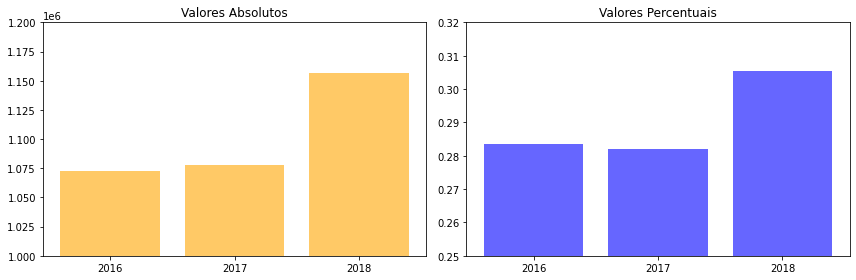

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for year in years:
  plt.bar(year, df[ df.type.isin(clean_energy) ][year].sum(), color='orange', alpha=0.6)

plt.ylim([10**6,1.2*10**6])
plt.title('Valores Absolutos')

plt.subplot(1,2,2)
for year in years:
  plt.bar(year, df[ df.type.isin(clean_energy) ][year].sum() / df[year].sum(), color='blue', alpha=0.6)

plt.ylim([0.25,0.32])
plt.title('Valores Percentuais')

plt.tight_layout()
plt.show()